<a href="https://colab.research.google.com/github/hn-iiitd/ML_Project/blob/harsh_hingorani/ML_project_Hingorani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [ ]:
!wget https://raw.githubusercontent.com/hn-iiitd/ML_Project/refs/heads/main/online_gaming_behavior_dataset_updated.csv?token=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ
!mv ./online_gaming_behavior_dataset_updated.csv\?token\=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ online_gaming_behavior_dataset_updated.csv
# ! curl https://drive.google.com/file/d/1YEfzyYEqyvmkdOowMGYFMjW1h5USuoKq/view?usp=sharing
fd = pd.read_csv("./online_gaming_behavior_dataset_updated.csv")
fd.head()

--2024-11-28 14:33:18--  https://raw.githubusercontent.com/hn-iiitd/ML_Project/refs/heads/main/online_gaming_behavior_dataset_updated.csv?token=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-28 14:33:19 ERROR 404: Not Found.

mv: cannot stat './online_gaming_behavior_dataset_updated.csv?token=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ': No such file or directory


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,EstimatedAnnualIncome
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,79331
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,50503
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,119538
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,79729
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,57106


In [ ]:
df = pd.read_csv('/content/online_gaming_behavior_dataset_updated.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,EstimatedAnnualIncome
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,79331
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,50503
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,119538
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,79729
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,57106


In [ ]:
label_encoder = LabelEncoder()
ToEncode = ['Gender','Location','GameGenre','GameDifficulty','EngagementLevel']
for col in ToEncode:
    df[col] = label_encoder.fit_transform(df[col])

x = df.drop(columns=['PlayerID', 'InGamePurchases'])
y = df['InGamePurchases']



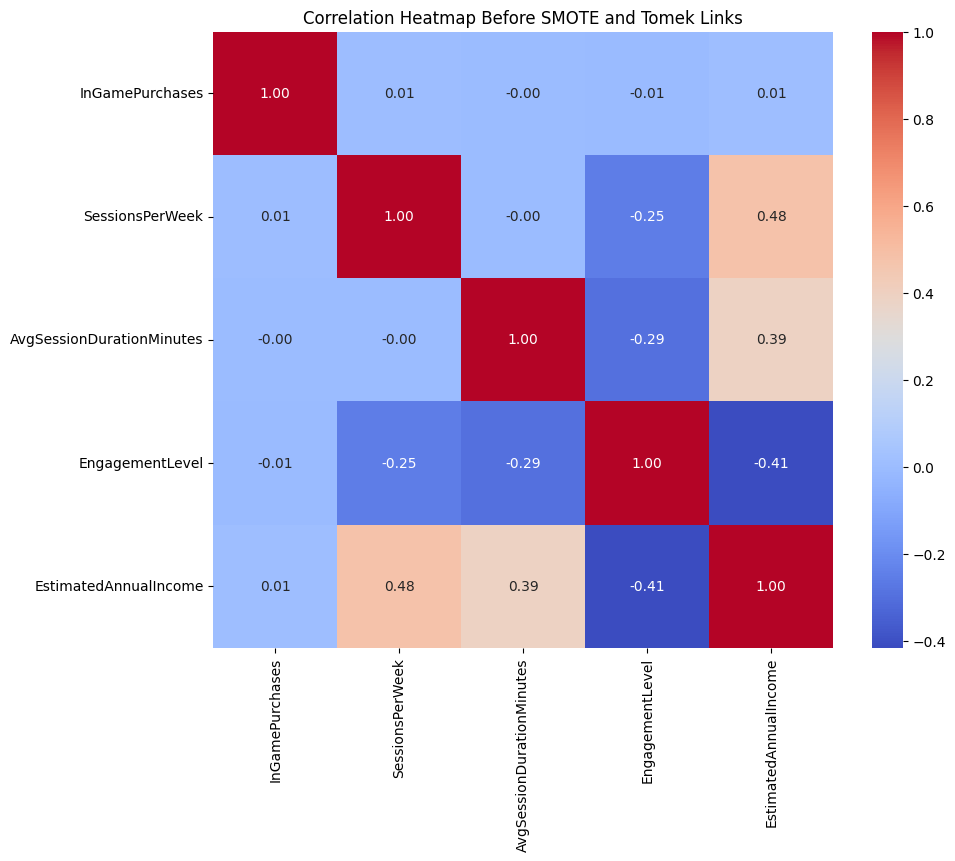

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#
X = df.drop(columns = ["PlayerID", "Age", "Gender", "Location", "GameGenre","PlayTimeHours","GameDifficulty","PlayerLevel","AchievementsUnlocked"], axis=1)
y = df['InGamePurchases']

combined_data = X.copy()
combined_data['InGamePurchases'] = y

corr_matrix_before = combined_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_before, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Before SMOTE and Tomek Links')
plt.show()


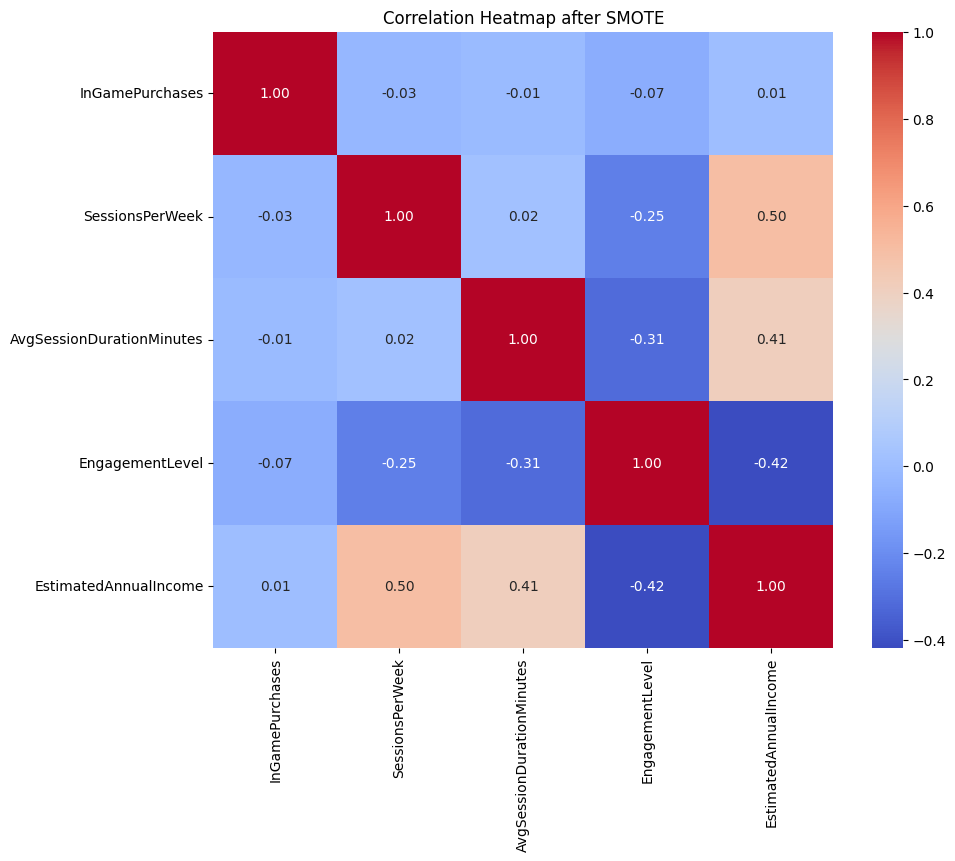

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = df.drop(columns = ["PlayerID", "Age", "Gender", "Location", "GameGenre","PlayTimeHours","GameDifficulty","PlayerLevel","AchievementsUnlocked"], axis=1)
y = df['InGamePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['InGamePurchases'] = y_resampled

corr_matrix_smote = resampled_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_smote, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after SMOTE')
plt.show()


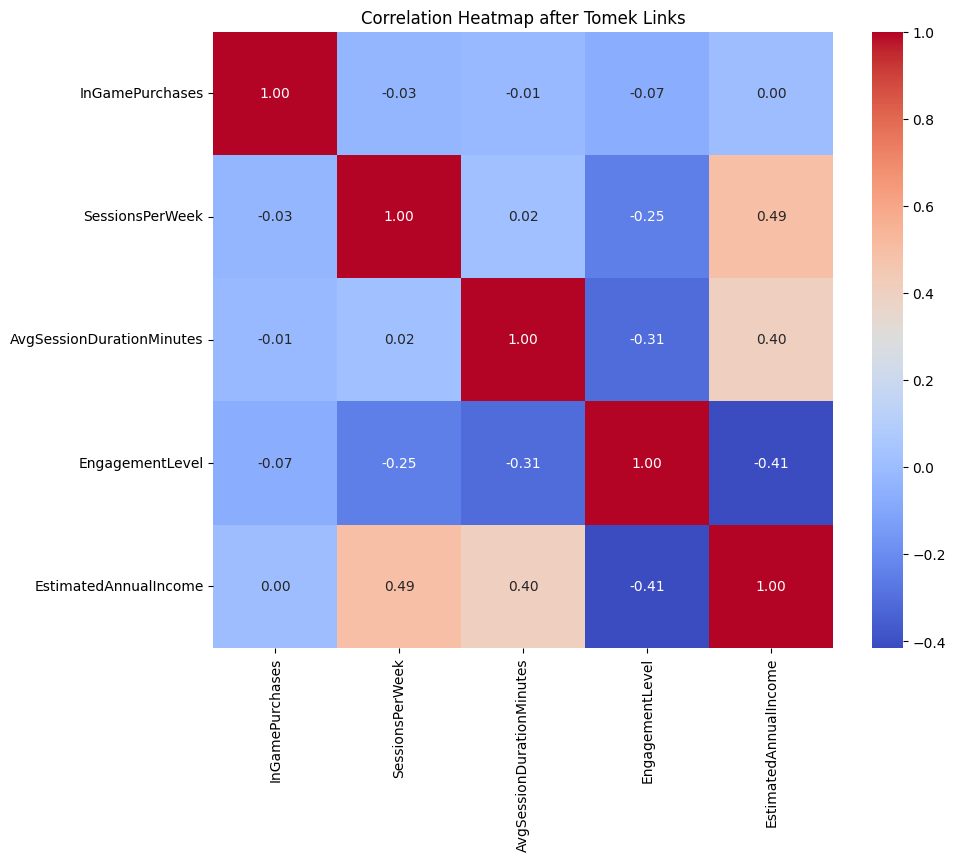

In [ ]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_resampled, y_resampled)

tomek_data = pd.DataFrame(X_tomek, columns=X.columns)
tomek_data['InGamePurchases'] = y_tomek

corr_matrix_tomek = tomek_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tomek, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after Tomek Links')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter = 10000)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5597602098164106


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


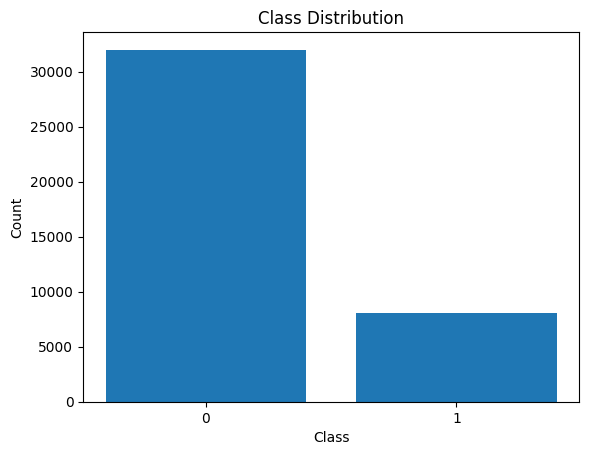

In [ ]:
count1= 0
count0 = 0
for i in range(len(y)):
  if y[i] == 1:
    count1 += 1
  else:
    count0 += 1

plt.bar(['0', '1'], [count0, count1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
#applying smote
from imblearn.over_sampling import SMOTE
count1 = 0;
count0 = 0;
from imblearn.under_sampling import RandomUnderSampler



In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the model
model = LogisticRegression(max_iter = 10000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7964281253902835


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42)

clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6316972648932184
Confusion Matrix:
 [[4616 1761]
 [1188  442]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      6377
           1       0.20      0.27      0.23      1630

    accuracy                           0.63      8007
   macro avg       0.50      0.50      0.49      8007
weighted avg       0.67      0.63      0.65      8007



Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [1000, 2500, 50000]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Grid Search for each model
for name, model in models.items():
    if param_grids.get(name):  # If hyperparameter grid exists for this model
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=3, n_jobs=-1, verbose=1)
        grid_search.fit(X, y)  # X and y need to be defined, or replace with your dataset
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_
    else:
        best_model = model  # For Naive Bayes, no hyperparameter grid to search
        print(f"No hyperparameters to tune for {name}")

    # Optionally, you can train the best model on the full dataset (if needed)
    # best_model.fit(X_resampled, y_resampled)

    # Output the best model found
    print(f"Best Model for {name}: {best_model}")


Bootstrapping

Logistic Regression - Mean Accuracy: 0.5052
Logistic Regression - 95% Confidence Interval: [0.44850756 0.55381541]
Naive Bayes - Mean Accuracy: 0.5227
Naive Bayes - 95% Confidence Interval: [0.45677844 0.56797177]
Random Forest - Mean Accuracy: 0.7894
Random Forest - 95% Confidence Interval: [0.78779818 0.79164169]
Decision Tree - Mean Accuracy: 0.6315
Decision Tree - 95% Confidence Interval: [0.62161546 0.64550393]


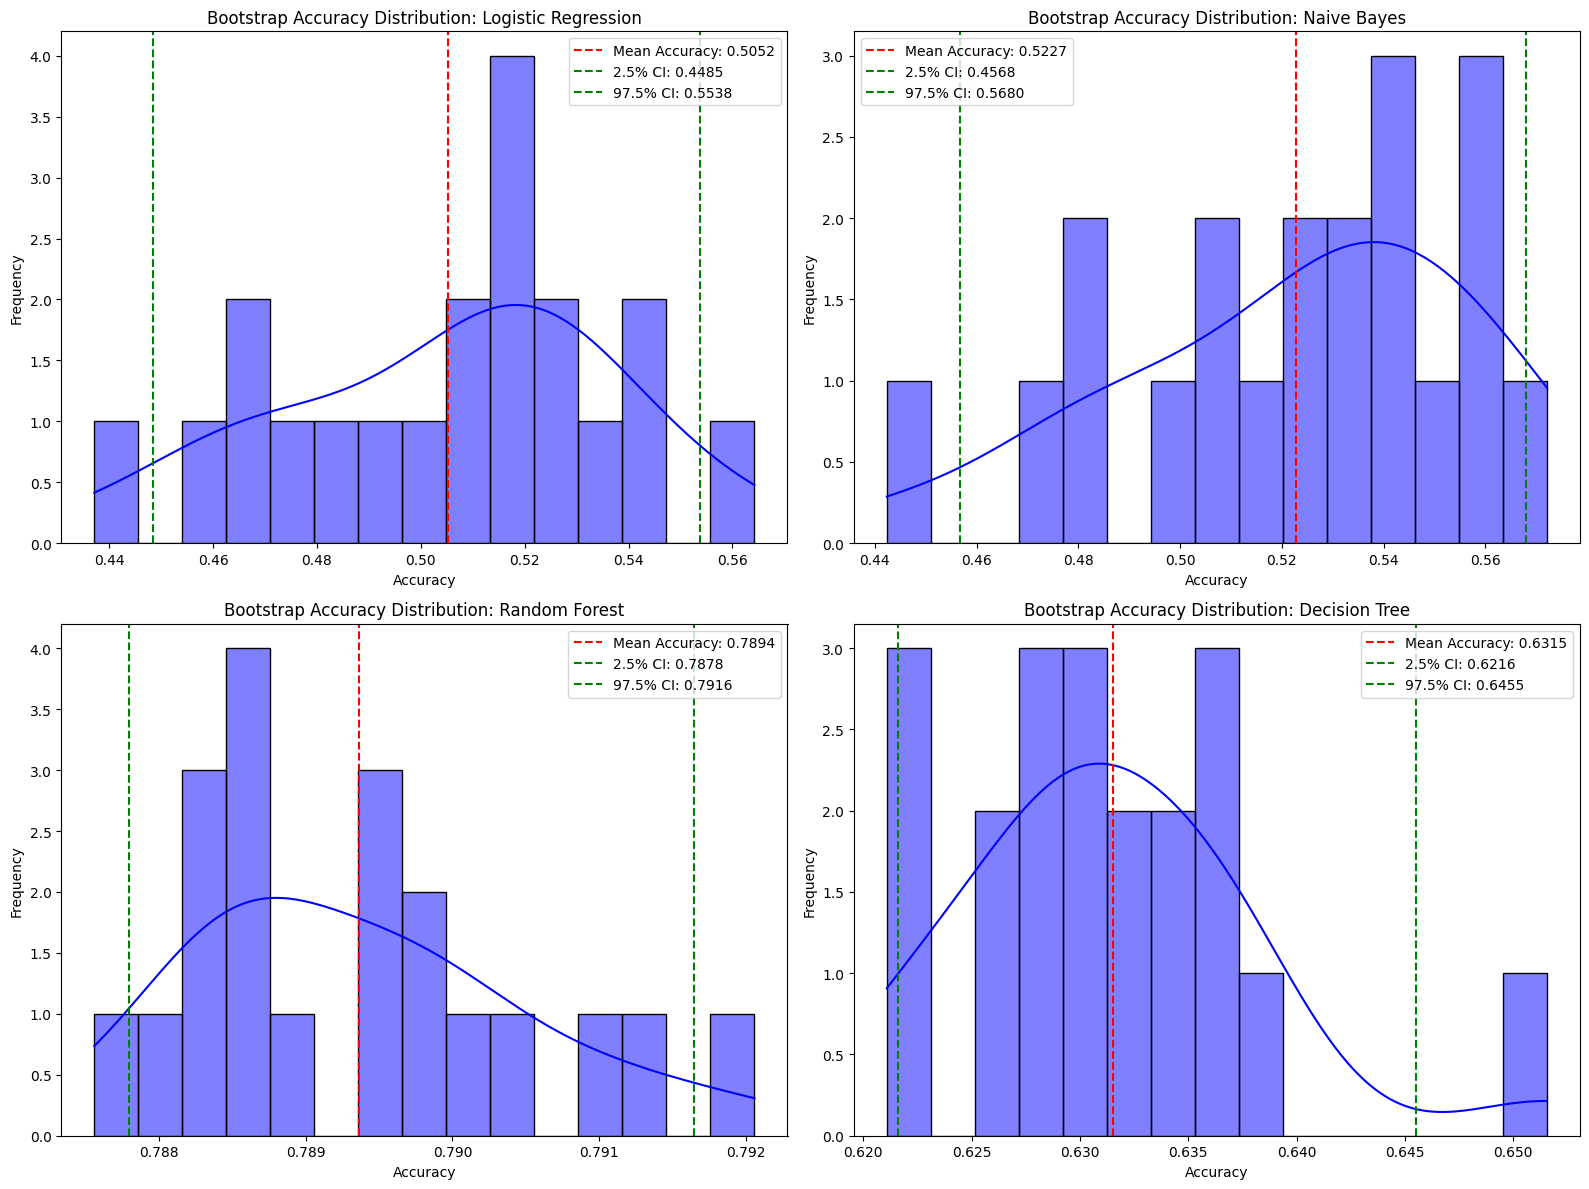

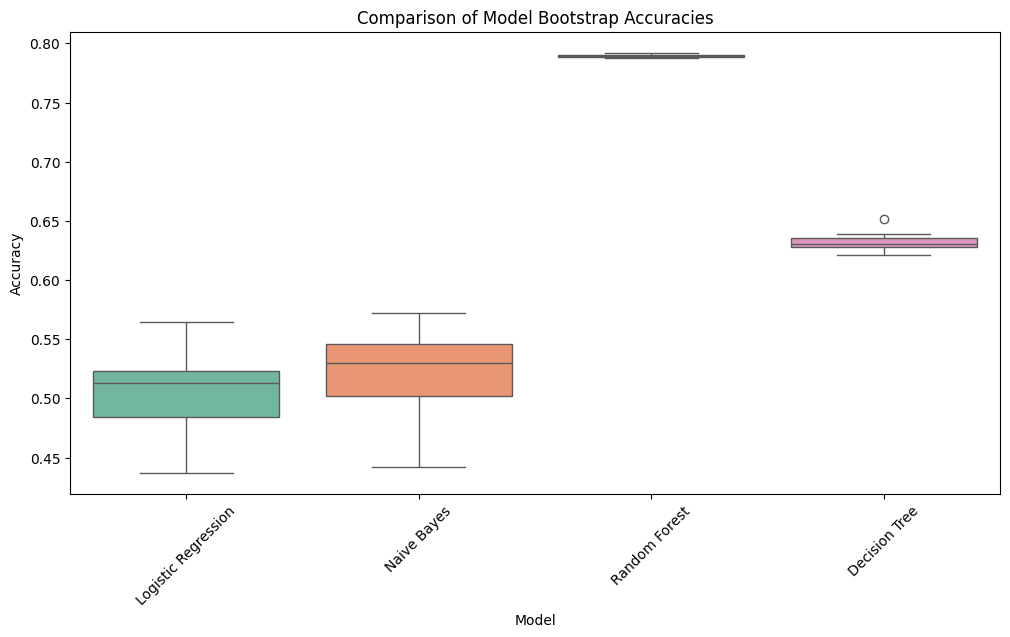

In [ ]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Parameters for bootstrapping
n_iterations = 20  # Number of bootstrap iterations
bootstrap_results = {name: [] for name in models.keys()}

for name, model in models.items():
    for i in range(n_iterations):
        # Create a bootstrap sample
        X_bootstrap, y_bootstrap = resample(X_resampled, y_resampled, random_state=i)

        # Train the model on the bootstrap sample
        model.fit(X_bootstrap, y_bootstrap)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_test, y_pred)
        bootstrap_results[name].append(accuracy)

# Calculate mean accuracy and confidence intervals for each model
summary = {}
for name, accuracies in bootstrap_results.items():
    accuracies = np.array(accuracies)
    mean_accuracy = np.mean(accuracies)
    confidence_interval = np.percentile(accuracies, [2.5, 97.5])
    summary[name] = {
        "mean_accuracy": mean_accuracy,
        "confidence_interval": confidence_interval,
        "accuracies": accuracies
    }

    print(f"{name} - Mean Accuracy: {mean_accuracy:.4f}")
    print(f"{name} - 95% Confidence Interval: {confidence_interval}")

# Visualization
plt.figure(figsize=(16, 12))

# Subplots for histograms
for idx, (name, data) in enumerate(summary.items()):
    plt.subplot(2, 2, idx + 1)
    sns.histplot(data['accuracies'], bins=15, kde=True, color='blue')
    mean_accuracy = data["mean_accuracy"]
    confidence_interval = data["confidence_interval"]
    plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
    plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'2.5% CI: {confidence_interval[0]:.4f}')
    plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'97.5% CI: {confidence_interval[1]:.4f}')
    plt.title(f'Bootstrap Accuracy Distribution: {name}')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Combined Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=[data['accuracies'] for data in summary.values()], palette="Set2")
plt.xticks(range(len(models)), models.keys(), rotation=45)
plt.title('Comparison of Model Bootstrap Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


Bootstrapping plots

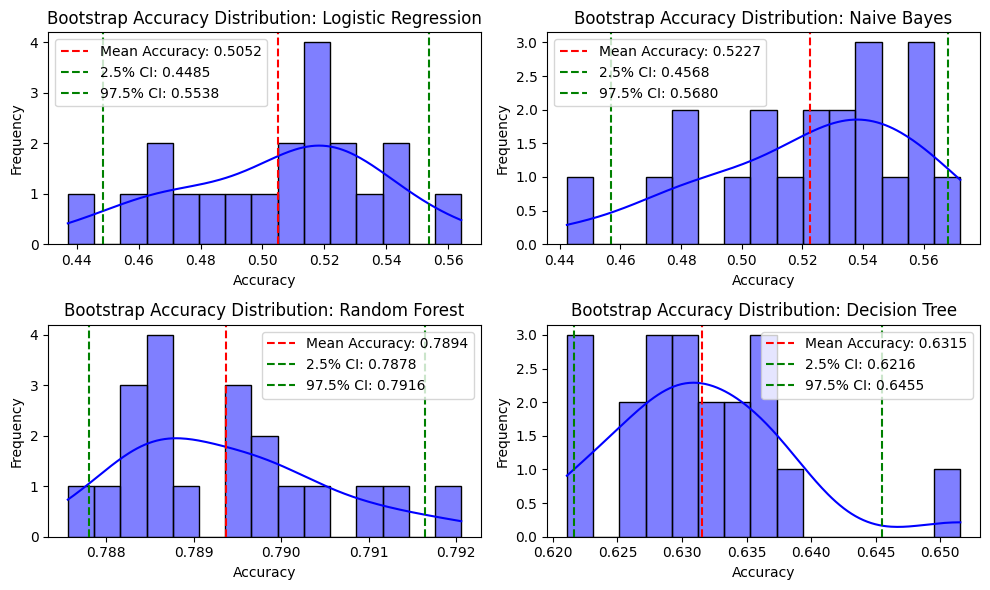

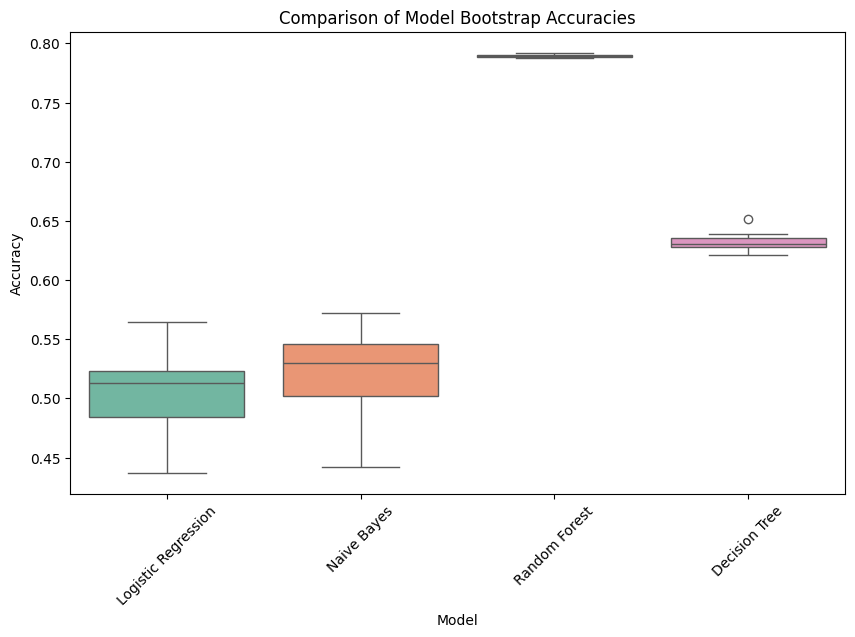

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))

# Subplots for histograms
for idx, (name, data) in enumerate(summary.items()):
    plt.subplot(2, 2, idx + 1)
    sns.histplot(data['accuracies'], bins=15, kde=True, color='blue')
    mean_accuracy = data["mean_accuracy"]
    confidence_interval = data["confidence_interval"]
    plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
    plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'2.5% CI: {confidence_interval[0]:.4f}')
    plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'97.5% CI: {confidence_interval[1]:.4f}')
    plt.title(f'Bootstrap Accuracy Distribution: {name}')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Combined Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['accuracies'] for data in summary.values()], palette="Set2")
plt.xticks(range(len(models)), models.keys(), rotation=45)
plt.title('Comparison of Model Bootstrap Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from collections import defaultdict

# Function to evaluate models using K-Fold cross-validation
def evaluate_models_kfold(X, y, k=5):
    models = {
        'Logistic Regression': LogisticRegression(C=0.001, solver='lbfgs', max_iter=10000),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42),
        'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42,n_estimators=100)
    }

    results = defaultdict(list)

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for name, model in models.items():
        accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        precision = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(precision_score, average='binary'))
        recall = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(recall_score, average='binary'))

        results['Model'].append(name)
        results['Accuracy'].append(np.mean(accuracy))
        results['Precision'].append(np.mean(precision))
        results['Recall'].append(np.mean(recall))

    return pd.DataFrame(results)

X = df.drop(columns=['PlayerID', 'InGamePurchases','Location','EngagementLevel'],axis = 1)
y = df['InGamePurchases']


original_results = evaluate_models_kfold(X, y, k=5)

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
smote_results = evaluate_models_kfold(X_resampled_smote, y_resampled_smote, k=5)

tomek = TomekLinks()
X_resampled_tomek, y_resampled_tomek = tomek.fit_resample(X, y)
tomek_results = evaluate_models_kfold(X_resampled_tomek, y_resampled_tomek, k=5)

comparison_df = pd.concat([
    original_results.assign(Method='Original'),
    smote_results.assign(Method='SMOTE'),
    tomek_results.assign(Method='Tomek Links')
])



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

colors = ['#FF0000', '#008000', '#0000FF']  # Red, Green, Blue

comparison_df['F1 Score'] = 2 * (comparison_df['Precision'] * comparison_df['Recall']) / (comparison_df['Precision'] + comparison_df['Recall'])

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))

    bar_plot = sns.barplot(x='Model', y=metric, hue='Method', data=comparison_df, palette=colors)

    for p in bar_plot.patches:
        height = p.get_height()
        if height > 0:
            bar_plot.annotate(f'{height:.2f}',
                              (p.get_x() + p.get_width() / 2., height),
                              ha='center', va='bottom',
                              fontsize=10,
                              color='black',
                              xytext=(0, 5),
                              textcoords='offset points')

    plt.title(f'Comparison of {metric} Using K-Fold Cross-Validation Before and After SMOTE and Tomek Links')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.legend(loc='lower right', title="Method")
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

def train_rf_with_smote(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    rf_model = RandomForestClassifier(
       criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42,n_estimators=100
    )
    rf_model.fit(X_train_resampled, y_train_resampled)

    return rf_model, X_test, y_test, X_train_resampled, y_train_resampled

def plot_evaluation_metrics(model, X_test, y_test, X_train_resampled, y_train_resampled):

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nClass distribution in original training data:")
    print(pd.Series(y_train_resampled).value_counts(normalize=True))

    feature_importance = pd.DataFrame({
        'feature': range(X_train_resampled.shape[1]),
        'importance': model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 4))
    plt.bar(range(len(feature_importance)), feature_importance['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

X = df.drop(columns=['PlayerID', 'InGamePurchases','Location','EngagementLevel'],axis = 1)
y = df['InGamePurchases']
rf_model, X_test, y_test, X_train_resampled, y_train_resampled = train_rf_with_smote(X, y)
plot_evaluation_metrics(rf_model, X_test, y_test, X_train_resampled, y_train_resampled)